#Лабораторная работа 2

Для выполнения задания будем использовать набор данных из предыдущей лр.

Импортируем часть необходимых библиотек:

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn

Теперь считаем датасет:

In [45]:
data = pd.read_csv('2017_2020_bmi.csv')

Добавим новый атрибут proportionality (пропорциональность) — это соотношение между ростом и весом, которое помогает оценить, насколько гармонично сложено тело человека.
proportionality = height / weight

In [46]:
proportionality_list = []
for i, row in data.iterrows():
    proportionality = row['height'] / row['weight']
    proportionality_list.append(proportionality)

proportionality = pd.Series(proportionality_list)
data.insert(0, "proportionality", proportionality)

In [47]:
data.shape

(7770, 6)

Проверим метаданные и количество пустых полей:

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   proportionality  7770 non-null   float64
 1   yr               7770 non-null   object 
 2   height           7770 non-null   float64
 3   weight           7770 non-null   float64
 4   bmi              7770 non-null   float64
 5   gender           7770 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 364.3+ KB


In [49]:
data.describe()

,proportionality,height,weight,bmi,gender
count,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000
mean,3.301110,150.460698,52.817423,22.074587,0.499228
std,1.368196,22.463589,18.356921,3.515722,0.500032
min,2.211736,65.120000,7.080000,14.340000,0.000000
25%,2.483631,149.960000,42.700000,19.200000,0.000000
50%,2.659116,157.495000,58.350000,23.800000,0.000000
75%,3.504176,163.920000,66.050000,24.970000,1.000000
max,9.197740,174.500000,77.880000,26.260000,1.000000


##"Причесывание" датасета

Сначала необходимо удалить ненужные данные. Это будут возраст (так как нечисловой тип данных) и гендер (так как в прошлой лабораторной работе выяснили, что зависимости переменных от гендера не наблюдается)

In [50]:
data = data.drop(['yr', 'gender'], axis="columns")
data = data.dropna()

Теперь нормализуем оставшиеся значения:

In [51]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normed_data = normalizer.fit_transform(data)
data = pd.DataFrame(normed_data, columns=data.columns.tolist())

Удалим данные с выбросами по Z-Score:

In [52]:
from scipy import stats
data.info()
for at in data:
    at_zscore = np.abs(stats.zscore(data[at]))
    data[at] = data[at][at_zscore<3]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   proportionality  7770 non-null   float64
 1   height           7770 non-null   float64
 2   weight           7770 non-null   float64
 3   bmi              7770 non-null   float64
dtypes: float64(4)
memory usage: 242.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   proportionality  7642 non-null   float64
 1   height           7574 non-null   float64
 2   weight           7770 non-null   float64
 3   bmi              7770 non-null   float64
dtypes: float64(4)
memory usage: 242.9 KB


In [53]:
data.isnull().sum()

,0
proportionality,128
height,196
weight,0
bmi,0


Выполним расчет и отображение процента пропущенных значений в каждом столбце, чтобы понять, можем мы удалять пропущенные значения или нужно заменить их:

In [54]:
df_null = round(100*(data.isnull().sum())/len(data), 2)
df_null

,0
proportionality,1.65
height,2.52
weight,0.00
bmi,0.00


Удалим пропущенные значения:

In [55]:
data = data.dropna()
data.shape

(7574, 4)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7574 entries, 90 to 7769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   proportionality  7574 non-null   float64
 1   height           7574 non-null   float64
 2   weight           7574 non-null   float64
 3   bmi              7574 non-null   float64
dtypes: float64(4)
memory usage: 295.9 KB


##Графики зависимости одной переменной от другой

Построим 3 графика зависимости переменных:

1.  Зависимость proportionality от bmi
2.  Зависимость proportionality от height
3.  Зависимость proportionality от weight





###График зависимости proportionality от bmi:

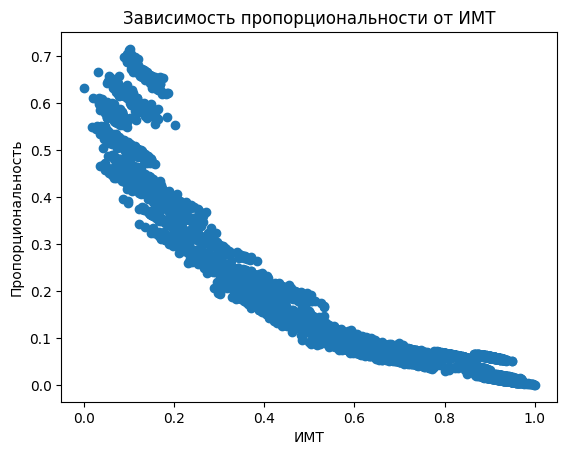

In [59]:
plt.scatter(data['bmi'],data['proportionality'])
plt.title('Зависимость пропорциональности от ИМТ')
plt.xlabel('ИМТ')
plt.ylabel('Пропорциональность')
plt.show()

По графику мы видим, что зависимость proportionality от bmi в основном обратная. Кластеры видны не отчетливо, но примерно можно выделить 3 группы:

*   Люди с высокой пропорциональностью и низким ИМТ
*   Люди со средней пропорциональностью и нормальным ИМТ
*   Люди с низкой пропорциональностью и высоким ИМТ

Шкала такая, потому что мы до этого нормализовали данные.



###График зависимости proportionality от height:

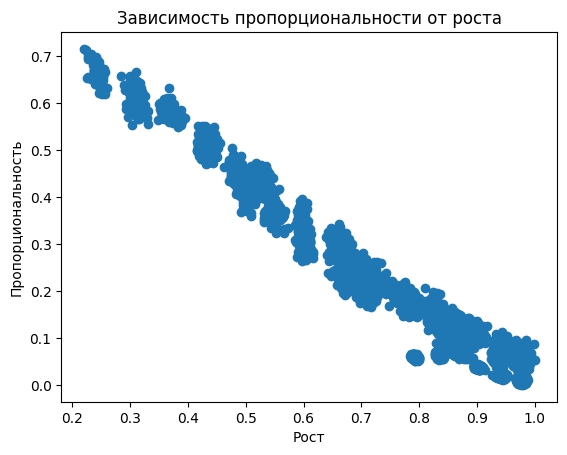

In [64]:
plt.scatter(data['height'],data['proportionality'])
plt.title('Зависимость пропорциональности от роста')
plt.xlabel('Рост')
plt.ylabel('Пропорциональность')
plt.show()

По графику мы видим, что зависимость proportionality от height линейная и обратная. Кластеры видны не отчетливо, но примерно можно выделить 3 группы:

*   Люди с высокой пропорциональностью и низким ростом
*   Люди со средней пропорциональностью и средним ростом
*   Люди с низкой пропорциональностью и высоким ростом



Не пугаемся, когда график не отвечает нашим ожиданиям о прямой зависимости пропорциональности от роста. Не следует забывать об изменениях веса и неоднородности данных. Для наглядности вот наш датасет, где по двум верхним строкам виден пример обратной пропорциональности:

In [67]:
data.head()

,proportionality,height,weight,bmi
90,0.636038,0.246114,0.095339,0.166946
91,0.647733,0.244743,0.092655,0.151846
92,0.657119,0.244835,0.090819,0.139262
93,0.619357,0.257085,0.101412,0.172819
94,0.639820,0.240903,0.093362,0.169463


###График зависимости proportionality от weight:

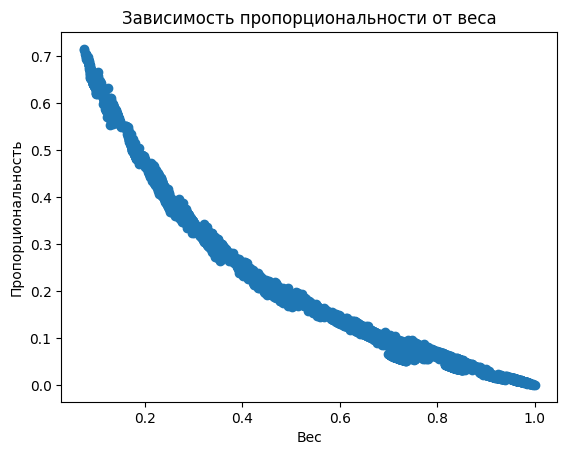

In [80]:
plt.scatter(data['weight'],data['proportionality'])
plt.title('Зависимость пропорциональности от веса')
plt.xlabel('Вес')
plt.ylabel('Пропорциональность')
plt.show()

По графику мы видим, что зависимость proportionality от weight обратная. Примерно можно выделить 4 группы:

*   Люди с высокой пропорциональностью и маленьким весом
*   Люди со средней пропорциональностью и нормальным весом
*   Люди с низкой пропорциональностью и нормальным весом
*   Люди с низкой пропорциональностью и большим весом



##KMeans кластеризация

###Определим оптимальное количество кластеров для bmi и proportionality с помощью метода локтя:

In [77]:
'''bmi and proportionality'''
from sklearn.cluster import KMeans
X1 = data[['bmi' , 'proportionality']].iloc[: , :].values
iner = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    iner.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


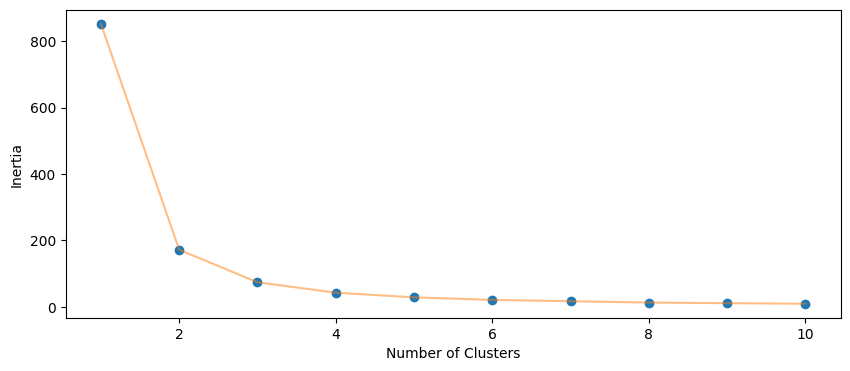

In [88]:
import matplotlib.pyplot as plt
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 11) , iner , 'o')
plt.plot(np.arange(1 , 11) , iner , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Получаем, что оптимальное количество кластеров для bmi и proportionality - 3, как и предполагали.

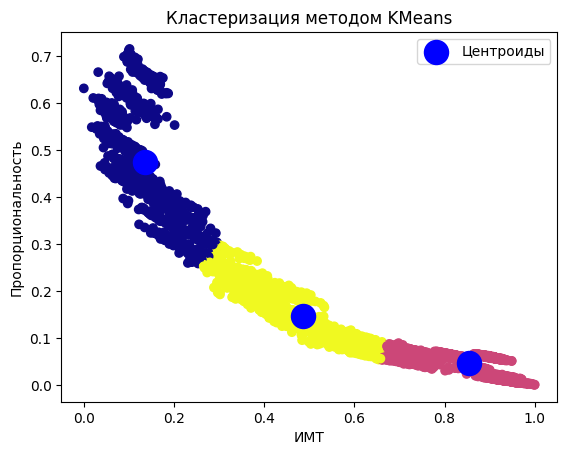

In [101]:
X = np.array(data[['bmi', 'proportionality']])

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label='Центроиды')
plt.title('Кластеризация методом KMeans')
plt.xlabel('ИМТ')
plt.ylabel('Пропорциональность')
plt.legend()
plt.show()

###Определим оптимальное количество кластеров для height и proportionality:

In [71]:
'''height and proportionality'''
from sklearn.cluster import KMeans
X1 = data[['height' , 'proportionality']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


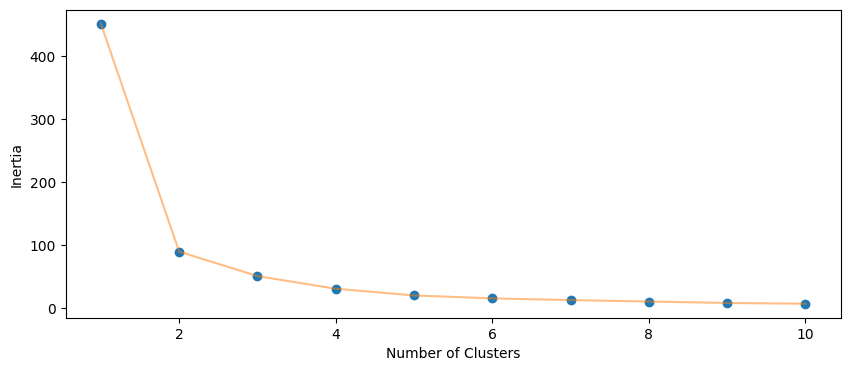

In [87]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Получаем, что оптимальное количество кластеров для height и proportionality - 3, как и предполагали.

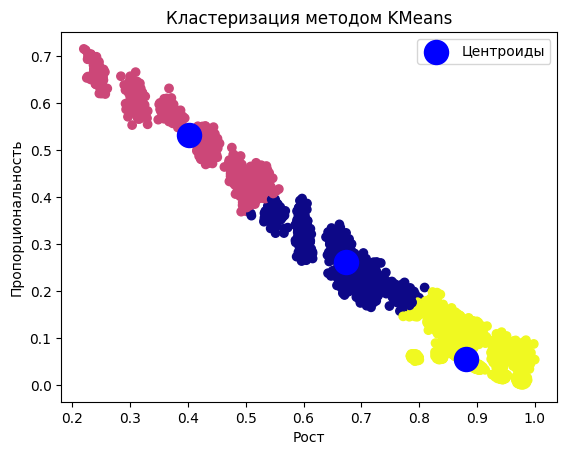

In [102]:
X = np.array(data[['height', 'proportionality']])

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label='Центроиды')
plt.title('Кластеризация методом KMeans')
plt.xlabel('Рост')
plt.ylabel('Пропорциональность')
plt.legend()
plt.show()

###Определим оптимальное количество кластеров для weight и proportionality:

In [89]:
'''weight and proportionality'''
from sklearn.cluster import KMeans
X1 = data[['weight' , 'proportionality']].iloc[: , :].values
inn = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inn.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


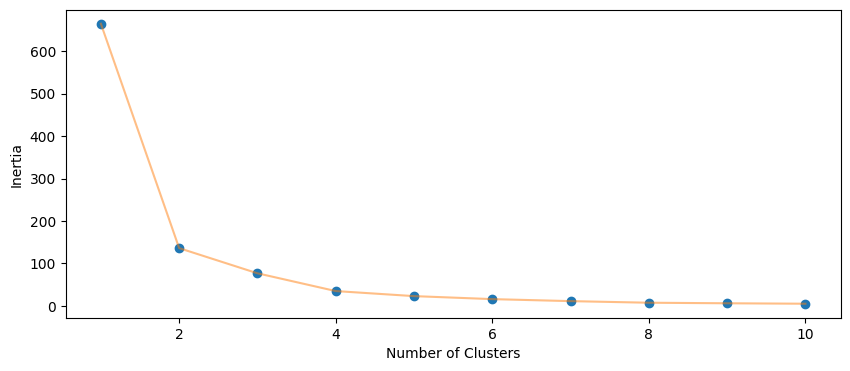

In [90]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 11) , inn , 'o')
plt.plot(np.arange(1 , 11) , inn , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Получаем, что оптимальное количество кластеров для weight и proportionality - 4, как и предполагали.

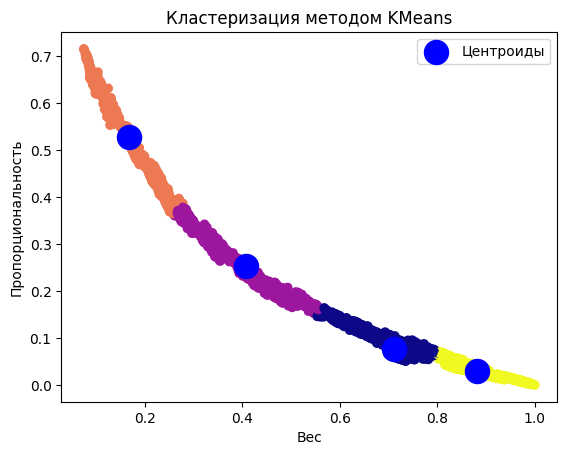

In [103]:
X = np.array(data[['weight', 'proportionality']])

kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label='Центроиды')
plt.title('Кластеризация методом KMeans')
plt.xlabel('Вес')
plt.ylabel('Пропорциональность')
plt.legend()
plt.show()

##Выводы

В процессе работы с датасетом был добавлен новый атрибут, который позволяет обогатить информацию о наблюдениях. В результате обработки данных были удалены выбросы и пустые значения, что позволило сделать анализ более надежным. По полученным данным были построены графики зависимости одной переменной от другой с помощью plt.scatter. В процессе работы метод K-Means был успешно применен к датасету. После выбора оптимального числа кластеров было выполнено разделение данных на кластеры, что позволило выделить группы с похожими характеристиками.

Таким образом, лабораторная работа по кластеризации K-Means предоставила возможность глубже понять метод кластеризации, а также освоить работу с библиотеками Python для анализа данных. Полученные результаты и визуализации позволили сделать выводы о структуре данных и выявить значимые группы, что может быть полезно для дальнейших исследований и практического применения в бизнесе.

